# CONDUCCIÓN DE CALOR EN 1D (Implementación de $w^2 / r$)
*Virgil Ortiz Lascurain*

**Fecha de finalización:** 4 de marzo de 2023

Tiempo: 4 hrs

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Parámetros físicos
L = 1.0
TA = 1
TB = 1
k = 1.0
S = 0.0

# Parámetros numéricos
N = 21

In [4]:
#Definición de la matriz modificada
def buildMatrix(N , d):
    A = np.zeros((N,N))
    
    for i in range(0,N-1):
        A[i,i+1]= -1 #Diagonal superior
        A[i+1,i]= -1 #Diagonal inferior
    
    for i in range(0,N):
        A[i,i]= 2 - d
    
    return A

In [5]:
#Modificación de la función empleada.
def conduccion_1d(k, S, L, TA, TB, N, w):
    
    #Docstring:
    
    """
    Parameters
    ----------
    
    L: float
    L es la longitud del dominio
    
    S: float
    Es la fuente.
    
    k: float
    Es la conductividad del material.
    
    TA: float
    Es la condición de la frontera izquierda.
    
    TB: float
    Es la condición de la forntera derecha.

    N: int
    Es el número de nodos internos (grados de libertad).
    
    w: float
    Constante.
    
    Return
    ------
    Perfil de temperatura del dominio.
    
    """
    h = L / (N + 1)
    r = k / h**2
    d = (w**2)/r #Término que se le restará al valor original (2) de la diagonal de la matriz.

    # arrays para almacenar datos:
    T = np.zeros(N + 2) 
    b = np.zeros(N)
    A = buildMatrix(N , d) #Implemetación de la función definida.

    b[:] = S / r
    b[0] += TA
    b[-1] += TB

    T[0] = TA
    T[-1] = TB

    #Solución del sistema de ecuaciones:
    T[1:N+1] = np.linalg.solve(A,b)
    
    print("T=", T)
    
    #Obtención de los valores de los puntos donde se calcula la temperatura.
    x = [h * i for i in range(1, N + 1)]
    x.insert(0, 0)
    x.append(L)

    plt.plot(x, T, color='gray')
    plt.plot(x, T, marker='o', color='cornflowerblue', linestyle='None', markerfacecolor='cornflowerblue', markeredgewidth=1, markeredgecolor='black')
    plt.xlabel("$x$")
    plt.ylabel("$T$")
    plt.show()

T= [ 1.          1.30272968  1.43942855  1.39267454  1.16842639  0.79526416
  0.32074678 -0.19464927 -0.68523757 -1.08849344 -1.35302256 -1.44511112
 -1.35302256 -1.08849344 -0.68523757 -0.19464927  0.32074678  0.79526416
  1.16842639  1.39267454  1.43942855  1.30272968  1.        ]


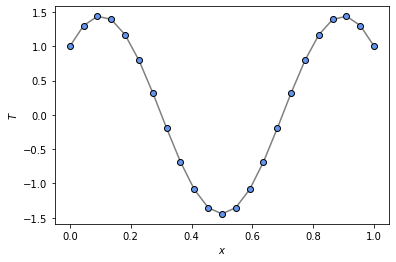

In [6]:
w = 2.5 * np . pi
conduccion_1d(k, S, L, TA, TB, N, w)

In [7]:
def solExact(x , w):
    x = np.array(x)
    return ((1.0 - np.cos(w))/np.sin(w)) * np.sin(w * x) + np.cos(w * x)

In [8]:
def conduccion_1d_comparation(k, S, L, TA, TB, N, w):
    
    #Docstring:
    
    """
    Parameters
    ----------
    
    L: float
    L es la longitud del dominio
    
    S: float
    Es la fuente.
    
    k: float
    Es la conductividad del material.
    
    TA: float
    Es la condición de la frontera izquierda.
    
    TB: float
    Es la condición de la forntera derecha.

    N: int
    Es el número de nodos internos (grados de libertad).
    
    w: float
    Constante.
    
    Return
    ------
    Perfiles de temperatura del dominio usando el método numérico y el método analítico.
    
    """
    h = L / (N + 1)
    r = k / h**2
    d = (w**2)/r 

    # arrays para almacenar datos:
    T = np.zeros(N + 2) 
    b = np.zeros(N)
    A = buildMatrix(N , d)

    b[:] = S / r
    b[0] += TA
    b[-1] += TB

    T[0] = TA
    T[-1] = TB

    #Solución del sistema de ecuaciones:
    T[1:N+1] = np.linalg.solve(A,b)
    
    x = [h * i for i in range(1, N + 1)]
    x.insert(0, 0)
    x.append(L)
    
    Error = np.linalg.norm (solExact(x,w) - T, 2)
    
    plt.plot(x, solExact(x , w), color='red', label = r'Sol. Analítica: $u(x) = \frac{1 - cos(\omega)}{sin(\omega)}$sin($\omega$x) + cos($\omega$x)')
    plt.plot(x, T, marker='o', color='cornflowerblue', linestyle='None', markerfacecolor='cornflowerblue', markeredgewidth=1, markeredgecolor='black', label = f"Sol. Numérica: E(h = {round(h, 7)}) = {round(Error, 4)}")
    plt.xlabel("$x$")
    plt.ylabel("$T$")
    plt.title(r'Ecuación: $\frac{\partial^2u(x)}{\partial x^2}$ = $\omega^2$u(x); u(a)=u(b)=1')
    plt.legend(loc='best', bbox_to_anchor=(1.1, 0.9))
    plt.show()

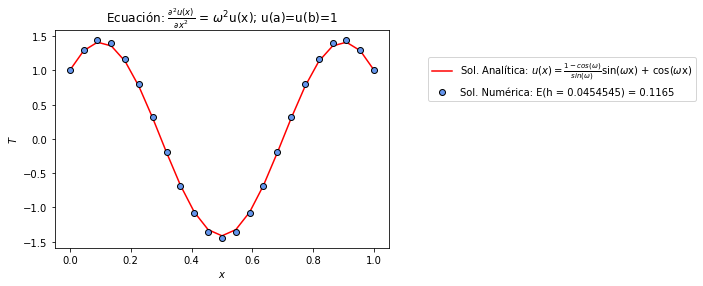

In [9]:
conduccion_1d_comparation(k, S, L, TA, TB, N, w)